In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, \
                            recall_score, f1_score, precision_recall_curve
from scipy.stats import randint

# Load data

In [9]:
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X, y = mnist['data'], mnist['target']

X.shape

(70000, 784)

# Looking for data

(-0.5, 27.5, 27.5, -0.5)

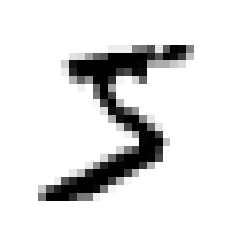

In [40]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')

In [26]:
y[0]

'5'

In [28]:
y = y.astype(np.uint8)

In [41]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training our model

In [43]:
knf_clf = KNeighborsClassifier()
knf_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
knf_clf.predict([some_digit])

array([5], dtype=uint8)

In [52]:
y_train_pred = cross_val_predict(knf_clf, X_train, y_train, cv=3)

In [58]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5882,    4,    5,    0,    1,    5,   19,    1,    2,    4],
       [   2, 6705,   10,    2,    1,    1,    3,   11,    2,    5],
       [  51,   60, 5695,   15,   11,    4,    9,   87,   17,    9],
       [   8,   16,   39, 5903,    1,   63,    4,   40,   33,   24],
       [   3,   53,    1,    1, 5628,    0,   13,   11,    2,  130],
       [  14,   18,    4,   67,    6, 5211,   58,    7,   11,   25],
       [  24,   13,    1,    0,    5,   27, 5846,    0,    2,    0],
       [   4,   68,   14,    3,   20,    1,    0, 6083,    3,   69],
       [  25,   85,   15,   87,   35,  111,   26,   19, 5382,   66],
       [  19,   13,    5,   45,   46,   12,    5,   79,   15, 5710]])

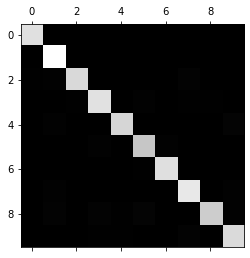

In [59]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

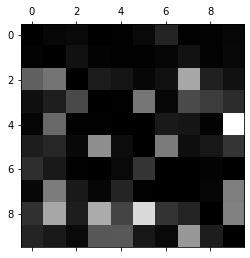

In [60]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [77]:
precision_score(y_train, y_train_pred, average='weighted')

0.9676755320854337

In [78]:
recall_score(y_train, y_train_pred, average='weighted')

0.9674166666666667

In [79]:
f1_score(y_train, y_train_pred, average='weighted')

0.9673453023960278

In [94]:
grid_params = [
    {'n_neighbors': [1, 2, 10, 20, 100], 'weights': ['uniform', 'distance']}
]

grid_search = GridSearchCV(knf_clf, grid_params, cv=3, 
                          scoring='f1_weighted')
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 